In [1]:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
# http://www.effbot.org/zone/librarybook-index.htm
# https://stooq.com/db/h/

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

In [2]:
filename = './data/daily/us/nasdaq stocks/1/aapl.us.txt'

In [3]:
f = open(filename, 'r')
f.readlines()[:5]

['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>\n',
 'AAPL.US,D,19840907,000000,0.10215,0.10339,0.10092,0.10215,96351188,0\n',
 'AAPL.US,D,19840910,000000,0.10215,0.10246,0.09969,0.10154,74784240,0\n',
 'AAPL.US,D,19840911,000000,0.10246,0.10524,0.10246,0.10339,176345676,0\n',
 'AAPL.US,D,19840912,000000,0.10339,0.104,0.1003,0.1003,154052988,0\n']

In [47]:
data = pd.read_csv(filename, index_col=2, parse_dates=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9115 entries, 1984-09-07 to 2020-11-05
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   9115 non-null   object 
 1   <PER>      9115 non-null   object 
 2   <TIME>     9115 non-null   int64  
 3   <OPEN>     9115 non-null   float64
 4   <HIGH>     9115 non-null   float64
 5   <LOW>      9115 non-null   float64
 6   <CLOSE>    9115 non-null   float64
 7   <VOL>      9115 non-null   int64  
 8   <OPENINT>  9115 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 712.1+ KB


In [88]:
closePrice = data[['<TICKER>','<CLOSE>']]

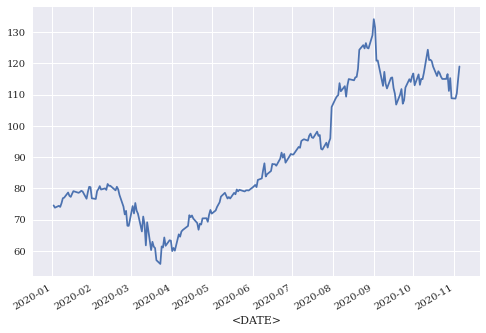

In [86]:
#start_date = '2020-09-01'
#end_date = '2020-11-05'
#closePrice['<DATE>']=pd.to_datetime(closePrice['<DATE>'])
#mask = (closePrice['<DATE>']>start_date) & (closePrice['<DATE>']<= end_date)
#closePrice = closePrice.loc[mask]
closePrice2020 = closePrice.loc['2020']
closePrice2020.plot()

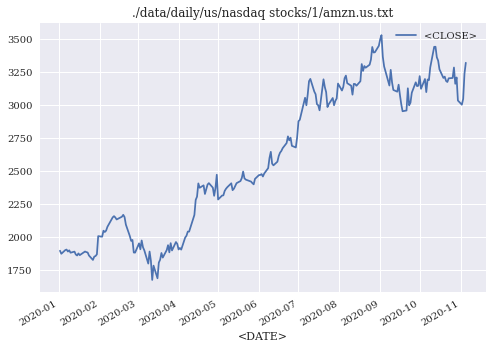

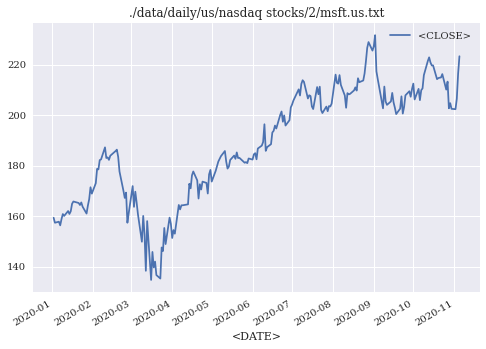

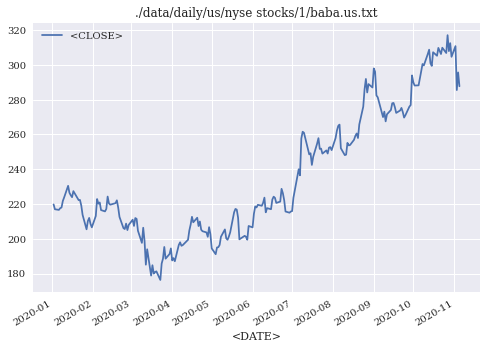

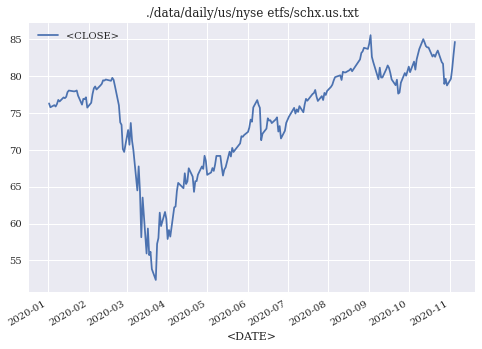

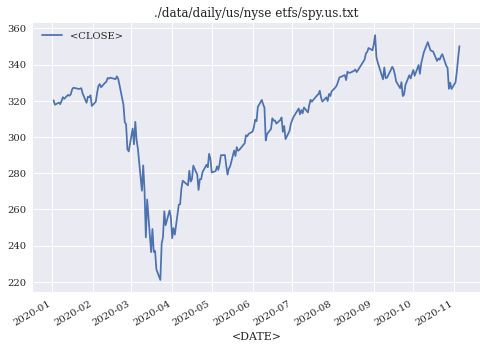

In [135]:
# https://stooq.com/db/h/

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

amzn = './data/daily/us/nasdaq stocks/1/amzn.us.txt'
msft = './data/daily/us/nasdaq stocks/2/msft.us.txt'
baba = './data/daily/us/nyse stocks/1/baba.us.txt'
schx = './data/daily/us/nyse etfs/schx.us.txt'
spy = './data/daily/us/nyse etfs/spy.us.txt'

filename = [amzn, msft, baba, schx, spy]

#filename = './data/20201108_dh.txt'

#a = 0
#while a < 5:
#    data = pd.read_csv(filename[a], index_col=2, parse_dates=True)
#    closePrice = data[['<TICKER>','<CLOSE>']]
#    closePrice2020 = closePrice.loc['2020']
#    closePriceDf = pd.DataFrame(closePrice2020)

a = 0
while a < 5:
    data = pd.read_csv(filename[a], index_col=2, parse_dates=True)
    closePrice = data[['<TICKER>','<CLOSE>']]
    closePrice2020 = closePrice.loc['2020']
    #print(filename[a])
    closePrice2020.plot(title=filename[a])
    a = a + 1


In [131]:
closePrice2020.head

<bound method NDFrame.head of            <TICKER>  <CLOSE>
<DATE>                      
2020-01-02  AMZN.US  1898.01
2020-01-03  AMZN.US  1874.97
2020-01-06  AMZN.US  1902.88
2020-01-07  AMZN.US  1906.86
2020-01-08  AMZN.US  1891.97
...             ...      ...
2020-10-30  AMZN.US  3036.15
2020-11-02  AMZN.US  3004.48
2020-11-03  AMZN.US  3048.41
2020-11-04  AMZN.US  3241.16
2020-11-05  AMZN.US  3322.00

[215 rows x 2 columns]>

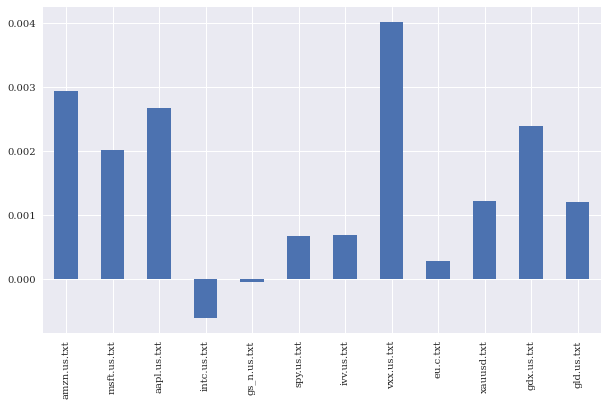

In [64]:
# Python 3
# Python for Finance, 2nd ed., Hilpisch, Ives
# Chapter 8 - Financial Time Series
# Figure 8-2 Mean values of percentage changes as bar plot
# https://stooq.com/db/h/
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

path0 = './data/daily/us/nasdaq stocks/1/amzn.us.txt'
path1 = './data/daily/us/nasdaq stocks/2/msft.us.txt'
path2 = './data/daily/us/nasdaq stocks/1/aapl.us.txt'
path3 = './data/daily/us/nasdaq stocks/1/intc.us.txt'
path4 = './data/daily/us/nyse stocks/1/gs_n.us.txt'
path5 = './data/daily/us/nyse etfs/spy.us.txt'
path6 = './data/daily/us/nyse etfs/ivv.us.txt' #etf simulates SPX index
path7 = './data/daily/us/nyse etfs/vxx.us.txt' #etf simulates VIX index
path8 = './data/daily/world/commodities cash/eu.c.txt'
path9 = './data/daily/world/currencies/major/xauusd.txt' #stand-in for XAU index
path10 = './data/daily/us/nyse etfs/gdx.us.txt'
path11 = './data/daily/us/nyse etfs/gld.us.txt'

filename = [path0, path1, path2, path3, path4, path5, path6, \
            path7, path8, path9, path10, path11]

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    data = pd.read_csv(filename[i], index_col=2, parse_dates=True)
    closePrice = data['<CLOSE>']
    closePriceYear = closePrice.loc['2020']
    
    symbol_long = filename[i].split('/')
    symbol = symbol_long[-1]
    
    closePriceYear.rename(symbol, inplace=True)
    
    if i==0:
        closePriceSymbolList = pd.DataFrame(data=closePriceYear)
    closePriceSymbolList.loc[:,symbol] = closePriceYear
    
closePriceSymbolList.pct_change().mean().plot(kind='bar', figsize=(10,6))

    